<h1>Vivek Joshi</h1>

<h2> Prediction using UNSUPERVISED LEARNING</h2>

<h3> Description </h3>

In this projects we will predict the optimum number of clusters and plot them using **k-means** classification from the iris dataset in __scikit-learn__ ( _machine learning library_ ) 




In [62]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

Now we will load required dataset from datasets

In [63]:
iris = datasets.load_iris()

#converting it in tabular form

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

#lets print some data for test
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now we will try to find optimum number of clusters in the iris dataframe for k-means classification by __Elbow Method__

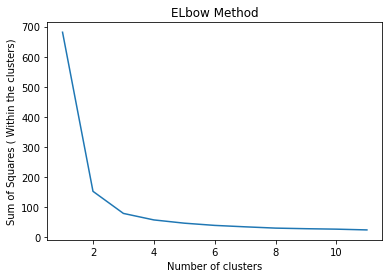

In [64]:
v = iris_df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
#Sum-Of-Squares within the cluster
SoS = []

for i in range(1, 12):
    k_m = KMeans(n_clusters=i, init = "k-means++", max_iter = 300, n_init=10, random_state = 0)
    k_m.fit(v)
    SoS.append(k_m.inertia_)

#plotting the values on graph to find the elbow

plt.plot(range(1, 12), SoS)
plt.title("ELbow Method")
plt.ylabel("Sum of Squares ( Within the clusters)")
plt.xlabel("Number of clusters")
plt.show()

Now you might be clear by now why this method is called __"Elbow Method"__ . The optimal number of clusters are determined by the bend which resemble elbow.
Lets observe above graph, from obsevation we can conclude to have 3 optimal clusters.

_Its time to apply k-mean to our data_

In [65]:
k_m = KMeans( n_clusters = 3, n_init = 12, init = 'k-means++', max_iter =  250, random_state = 0 )
y_mn = k_m.fit_predict(v)

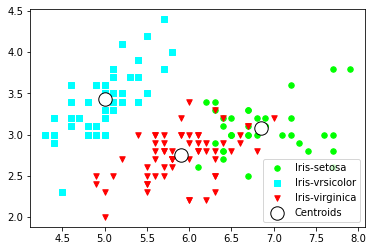

In [66]:
#visualising clusters on first two columns
plt.scatter(v[y_mn == 0,0], v[y_mn == 0,1], s = 30, c = "lime", label = 'Iris-setosa', marker = 'o')
plt.scatter(v[y_mn == 1,0], v[y_mn == 1,1], s = 30, c = 'cyan', marker = 's', label = 'Iris-vrsicolor')
plt.scatter(v[y_mn == 2,0], v[y_mn == 2,1], s = 30, c = 'red', marker = 'v', label = 'Iris-virginica')

#lets plot the centroids now
plt.scatter(k_m.cluster_centers_[:, 0], k_m.cluster_centers_[:, 1], c = "white", s = 180, edgecolor = 'black', label = 'Centroids')

plt.legend()